<a href="https://colab.research.google.com/github/hadjer2018/TP1_ASGBD/blob/master/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#testing in cifar data 
import torch
import torchvision
import torchvision.transforms as transforms


In [23]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


(3, 36, 138)


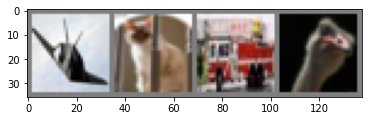

plane cat truck bird


In [24]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
from matplotlib import pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    print(npimg.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter=iter(trainloader)
images,labels=dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join(classes[labels[j]] for j in range (4)))


In [0]:
#define a convolutionnel nueral network for cifar dataset
#we copy the last code 
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
#define a optimizer
import torch.optim as optim
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.01,momentum=0.9)

In [27]:
#train the network
epochs=2 
loss_global=0.0
for epoch in range (epochs):
  for i, data in enumerate(trainloader,0):
    inputs,labels=data
    optimizer.zero_grad()
    output=net(inputs)
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step()
    #print(loss) 

    loss_global+= loss.item()
    if ( i % 2000 == 1999 ):
      print('[%d,  %5d] loss: %.3f'%  (epoch+1,i+1,loss_global/(2000)))
      loss_global=0.0
  
  print("finished training")

[1,   2000] loss: 2.076
[1,   4000] loss: 1.965
[1,   6000] loss: 1.939
[1,   8000] loss: 1.959
[1,  10000] loss: 1.949
[1,  12000] loss: 1.979
finished training
[2,   2000] loss: 2.466
[2,   4000] loss: 1.971
[2,   6000] loss: 1.984
[2,   8000] loss: 2.002
[2,  10000] loss: 2.024
[2,  12000] loss: 2.019
finished training


In [0]:
#we save our model 
PATH= './cifar_net.pth'
torch.save(net.state_dict(),PATH) # we  saved  only the model parameters ==> see documumentation


(3, 36, 138)


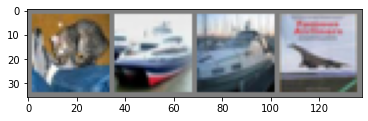

GroundTruth    cat  ship  ship plane


In [29]:
#testing the model
dataiter=iter(testloader)
images,labels=dataiter.next()

imshow(torchvision.utils.make_grid(images))

print('GroundTruth ',' '.join('%5s' % classes[labels[j]] for j in range (4)))

In [30]:
#load back our saved model
PATH= './cifar_net.pth'
net=Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [0]:
outputs=net(images)

In [32]:
print(outputs)

tensor([[-0.0080,  0.5711, -0.0032, -0.3284, -0.1586, -0.0243, -0.5272, -0.2034,
          0.1186,  0.2560],
        [ 0.5357,  1.3660, -0.3470, -0.7834, -0.6696, -0.7494, -0.9735, -0.3524,
          0.7583,  1.2110],
        [ 0.5357,  1.3660, -0.3470, -0.7834, -0.6696, -0.7494, -0.9735, -0.3524,
          0.7583,  1.2110],
        [ 0.5357,  1.3660, -0.3470, -0.7834, -0.6696, -0.7494, -0.9735, -0.3524,
          0.7583,  1.2110]], grad_fn=<AddmmBackward>)


In [33]:
_,predicted=torch.max(outputs,1)
print (predicted)

print('Predicted ',' '.join('%5s' % classes[labels[j]] for j in range (4)))

tensor([1, 1, 1, 1])
Predicted    cat  ship  ship plane


In [34]:
import torch
a = torch.tensor([1,2])
b= torch.tensor([1,3])
x=(a==b).squeeze()
for i in range(2):
  print(x[i].item())

True
False


In [35]:
#compute the performance of the network
total=0
correct=0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
      
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 28 %


In [41]:
#perfom classes 
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
      images, labels = data
      outputs = net(images)
      _, predicted = torch.max(outputs, 1)
      c =(predicted==labels).squeeze()
      for i in range (4):
        label=labels[i]
        class_correct[label]+=c[i].item()
        class_total[label]+=1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 43 %
Accuracy of   car : 70 %
Accuracy of  bird : 12 %
Accuracy of   cat :  8 %
Accuracy of  deer : 45 %
Accuracy of   dog : 27 %
Accuracy of  frog : 21 %
Accuracy of horse : 16 %
Accuracy of  ship : 24 %
Accuracy of truck : 11 %


In [0]:
PATH= './models'
torch.save(model.json,PATH) 

In [42]:
from google.colab import files
files.download('model.json')

FileNotFoundError: ignored

In [45]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model_save_name = 'classifier.pt'
path = F"/content/drive/My Drive/{model_save_name}" 
torch.save(net.state_dict(), path)

In [49]:
#load back our saved model from drive to colab
path = F"/content/drive/My Drive/{model_save_name}" 
net=Net()
net.load_state_dict(torch.load(path))

<All keys matched successfully>

In [50]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
      images, labels = data
      outputs = net(images)
      _, predicted = torch.max(outputs, 1)
      c =(predicted==labels).squeeze()
      for i in range (4):
        label=labels[i]
        class_correct[label]+=c[i].item()
        class_total[label]+=1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 43 %
Accuracy of   car : 70 %
Accuracy of  bird : 12 %
Accuracy of   cat :  8 %
Accuracy of  deer : 45 %
Accuracy of   dog : 27 %
Accuracy of  frog : 21 %
Accuracy of horse : 16 %
Accuracy of  ship : 24 %
Accuracy of truck : 11 %


In [0]:
#training on gpu
